<a href="https://colab.research.google.com/github/tserre/paper-2025-hmax/blob/main/make_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import ast
import re

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator, FixedFormatter


In [ ]:
# FOR FIG 2 Hmax 3.0 vs resnet, alexnet

hmax_adj = [63.808, 68.108, 70.62, 72.192, 71.6, 70.184, 65.7]
chresmax_data = [64.252, 68.298, 70.634, 72.056, 71.672, 69.462, 64.692]

# --- Data with Augmentations (hmax like augmentation, seen all scales) ---
alexnet_data_aug_hmaxlike = [49.222, 52.588, 54.55, 55.528, 54.718, 52.806, 47.876]
resnet_data_aug_hmaxlike = [64.914, 68.044, 69.844, 71.218, 71.43, 70.866, 67.596]

# --- Data with Augmentations (train with standard augmentation, 0.08 to 1) ---
alexnet_data_aug = [15.062, 23.224, 34.85, 48.546, 57.992, 57.06, 54.796]
resnet_data_aug = [36.364, 48.002, 56.926, 64.228, 71.476, 71.444, 70.058]

# --- Data without Augmentations (retrain the model removed acc) ---
alexnet_data_no_aug = [12.61, 19.51, 30.758, 45.246, 53.136, 49.158, 41.818]
resnet_data_no_aug = [35.266, 44.904, 53.628, 59.888, 65.808, 64.526, 59.73]

# FIG 3 Hungal Exp

# --- Panel 1: Classification Accuracy Data ---
alexnet_acc = [0.9942962962963, 0.6076111111111058, 0.5419074074073991, 0.6102222222222201, 0.5351111111111037]
hmax_3_acc = [0.9758888888889018, 0.9755740740740868, 0.975407407407421, 0.9569444444444428, 0.9566481481481462]
resnet_acc = [0.9945925925925956, 0.6209444444444431, 0.5562592592592541, 0.6148518518518474, 0.59401851851851]
human_acc = [0.875, 0.85, 0.91, 0.9, 0.83]

# --- Panel 2: D-Prime Data ---
alexnet_dprime = [1.0, 0.23205741626794257, 0.1428571428571428, 0.32619047619047614, 0.15238095238095234]
hmax_3_dprime = [0.95, 0.9023809523809523, 0.9023809523809523, 0.8523809523809524, 0.9023809523809523]
resnet_dprime = [1.0, 0.28743961352657, 0.22619047619047616, 0.2894736842105263, 0.27142857142857135]

# --- Global Plotting Configuration ---
global_palette = {
    'HMAX': '#3E7046',
    'CHMAX': '#65AA70',
    'AlexNet': '#036AA6',
    'ResNet': '#ff841f',
    'ChResMax': '#279C3A',
    'HMAX 3.0': '#279C3A',
    'Human': 'black'
}

global_model_names = {
    'AlexNet': 'AlexNet',
    'ResNet': 'ResNet',
    'HMAX': 'HMAX 2.1',
    'CHMAX': 'HMAX 2.5',
    'ChResMax': 'HMAX 3.0',
    'HMAX 3.0': 'HMAX 3.0',
    'Human': 'Human'
}

OUTPUT_PATH = '.'

# V4_Bar_Data_Pasupathy

V4_Bar_Data_Pasupathy = [
    0.014147909967845543, 0.0, 0.029581993569131756, 0.08874598070739544,
    0.14019292604501604, 0.5260450160771705, 0.1659163987138263,
    0.014147909967845543, 0.0398713826366559, 0.0, 0.0
]

# Black bars (Significant values)
V4_Bar_Data_Pasupathy_significant = [
    0, 0, 0.02700964630225076, 0.050160771704180034,
    0.02700964630225076, 0.0398713826366559, 0.014147909967845543,
    0, 0.01157556270096455, 0, 0
]

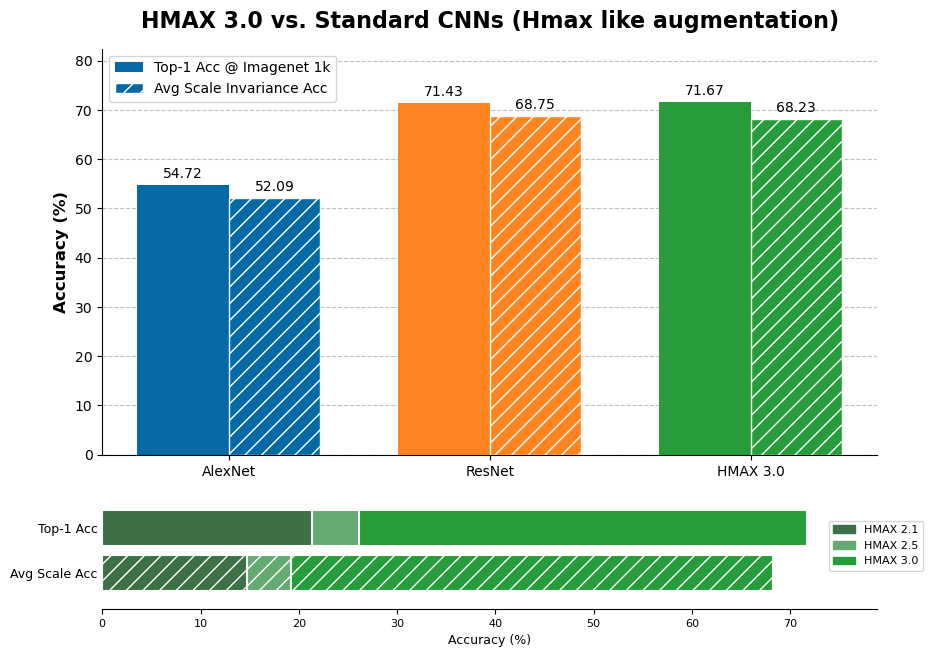

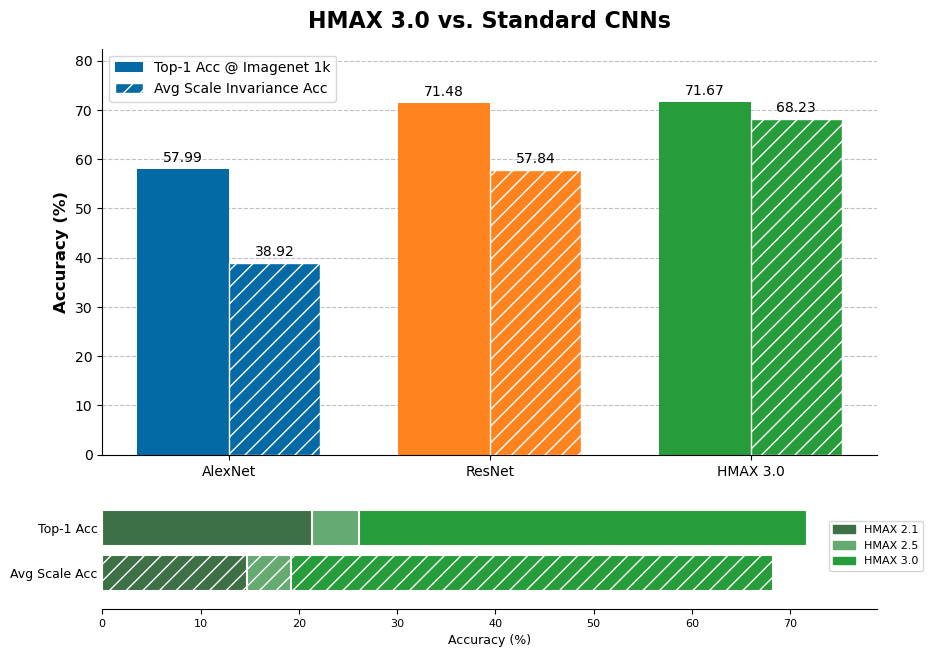

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def generate_plot(alexnet_data, resnet_data, title, filename):
    """
    Generates and saves a bar plot comparing model accuracies.

    Args:
        alexnet_data (list): A list of accuracy data for AlexNet.
        resnet_data (list): A list of accuracy data for ResNet.
        title (str): The title for the main plot.
        filename (str): The filename to save the plot to.
    """
    # chresmax_data is defined in the previous cell

    model_data = {
        'HMAX': {'imagenet_accuracy': 21.34, 'average_accuracy': 14.77},
        'CHMAX': {'imagenet_accuracy': 26.16, 'average_accuracy': 19.22},
        'AlexNet': {
            'imagenet_accuracy': alexnet_data[4],
            'average_accuracy': (sum(alexnet_data) - alexnet_data[4]) / 6
        },
        'ResNet': {
            'imagenet_accuracy': resnet_data[4],
            'average_accuracy': (sum(resnet_data) - resnet_data[4]) / 6
        },
        'ChResMax': {
            'imagenet_accuracy': chresmax_data[4],
            'average_accuracy': (sum(chresmax_data) - chresmax_data[4]) / 6
        }
    }

    # --- Create the Main Plot (Plot 2) ---
    fig, ax2 = plt.subplots(figsize=(10, 7))
    fig.subplots_adjust(bottom=0.3)

    final_models = ['AlexNet', 'ResNet', 'ChResMax']
    final_labels = [global_model_names[m] for m in final_models]
    final_imagenet = [model_data[m]['imagenet_accuracy'] for m in final_models]
    final_avg = [model_data[m]['average_accuracy'] for m in final_models]

    x = np.arange(len(final_labels))
    width = 0.35

    rects3 = ax2.bar(x - width/2, final_imagenet, width, label='Top-1 Acc @ Imagenet 1k', color=[global_palette[m] for m in final_models])
    rects4 = ax2.bar(x + width/2, final_avg, width, label='Avg Scale Invariance Acc', color=[global_palette[m] for m in final_models], hatch='//', edgecolor='white')

    # --- Styling for the Main Plot ---
    ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax2.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax2.set_xticks(x)
    ax2.set_xticklabels(final_labels)
    ax2.legend(fontsize=10, loc='upper left')

    ax2.set_ylim(0, max(final_imagenet + final_avg) * 1.15)
    ax2.bar_label(rects3, padding=3, fmt='%.2f')
    ax2.bar_label(rects4, padding=3, fmt='%.2f')

    ax2.spines[['top', 'right']].set_visible(False)
    ax2.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
    ax2.set_axisbelow(True)

    # --- Create and Draw the Inset Plot (Plot 1) underneath ---
    inset_pos = [0.125, 0.08, 0.775, 0.18]
    ax1 = fig.add_axes(inset_pos)

    hmax_models = ['HMAX', 'CHMAX', 'ChResMax']
    imagenet_plot_data = []
    avg_plot_data = []

    for model in hmax_models:
        imagenet_plot_data.append({
            'name': global_model_names[model], 'acc': model_data[model]['imagenet_accuracy'], 'color': global_palette[model]
        })
        avg_plot_data.append({
            'name': global_model_names[model], 'acc': model_data[model]['average_accuracy'], 'color': global_palette[model]
        })

    imagenet_plot_data_sorted = sorted(imagenet_plot_data, key=lambda x: x['acc'], reverse=True)
    avg_plot_data_sorted = sorted(avg_plot_data, key=lambda x: x['acc'], reverse=True)

    bar_height = 0.2
    y_positions = {'Top-1 Acc': 0.25, 'Avg Scale Acc': 0}

    for data in imagenet_plot_data_sorted:
        ax1.barh(y_positions['Top-1 Acc'], data['acc'], height=bar_height,
                 color=data['color'], edgecolor='white', linewidth=1.5)
    for data in avg_plot_data_sorted:
        ax1.barh(y_positions['Avg Scale Acc'], data['acc'], height=bar_height,
                 color=data['color'], edgecolor='white', hatch='//', linewidth=1.5)

    # --- Styling for the Inset Plot ---
    ax1.set_xlim(0, max(d['acc'] for d in imagenet_plot_data) * 1.1)
    ax1.set_ylim(-0.2, 0.5)

    legend_patches = [mpatches.Patch(color=global_palette[model], label=global_model_names[model]) for model in hmax_models]
    ax1.legend(handles=legend_patches, bbox_to_anchor=(0.93, 0.5), loc='center left', fontsize=8)

    ax1.spines[['top', 'right', 'left']].set_visible(False)
    ax1.spines['bottom'].set_visible(True)
    ax1.set_xlabel('Accuracy (%)', fontsize=9)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.set_yticks(list(y_positions.values()))
    ax1.set_yticklabels(list(y_positions.keys()), fontsize=9)
    ax1.tick_params(axis='y', length=0)

    # --- Final Layout and Save ---
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# --- Generate the Plots ---
# Plot with augmentations
generate_plot(alexnet_data_aug_hmaxlike, resnet_data_aug_hmaxlike, 'HMAX 3.0 vs. Standard CNNs (Hmax like augmentation)', f'{OUTPUT_PATH}/s1.png')

# Plot without augmentations
generate_plot(alexnet_data_aug, resnet_data_aug, 'HMAX 3.0 vs. Standard CNNs', f'{OUTPUT_PATH}/fig2.png')

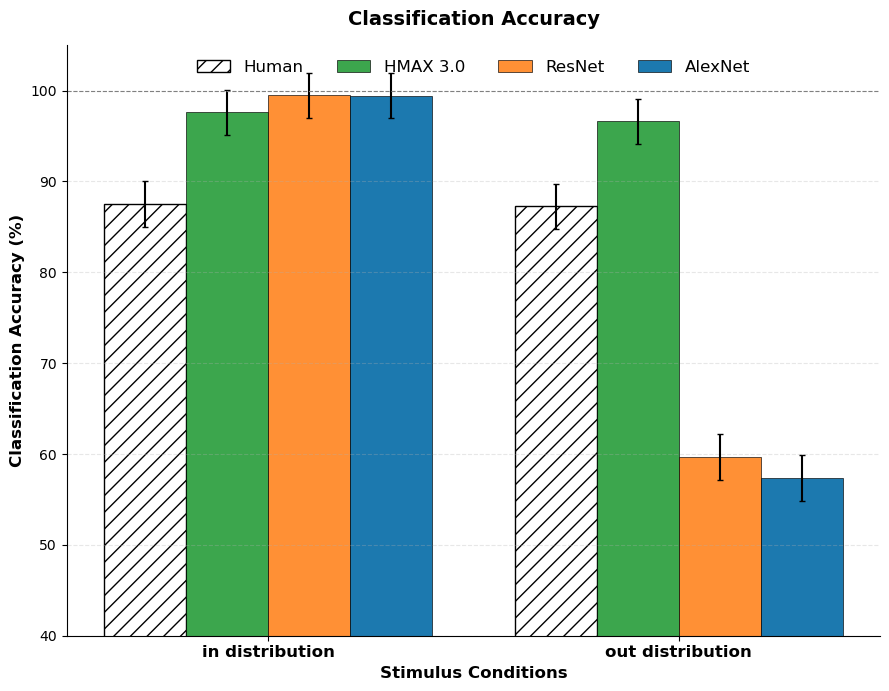

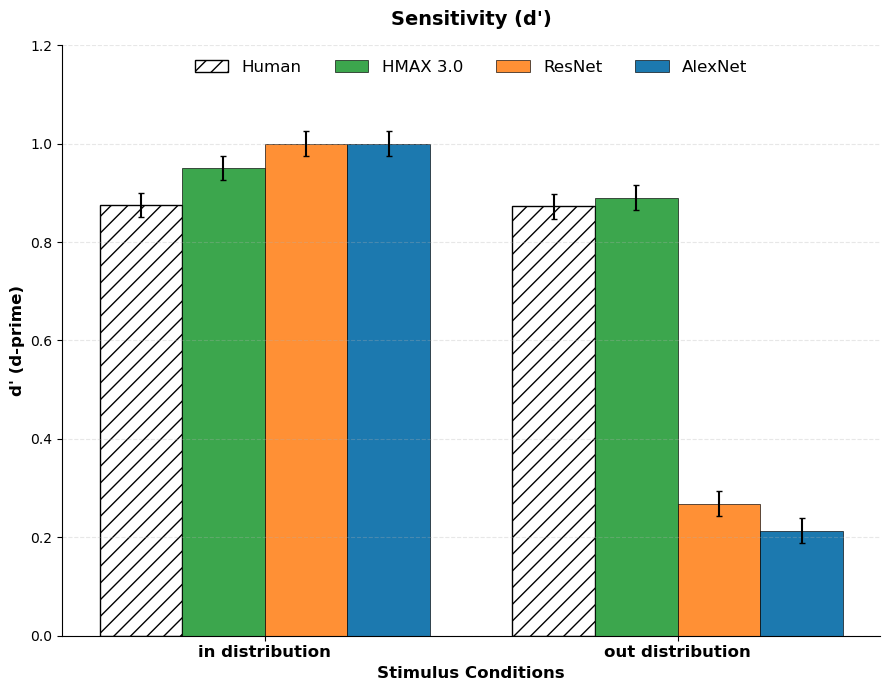

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# --- Panel 2: D-Prime Data ---
human_dprime = [0.875, 0.85, 0.91, 0.9, 0.83] # Same as accuracy data as per user

# --- Shared Error Data ---
# Assuming same error for both plots as none was provided for d-prime
err = [0.025, 0.025, 0.025, 0.025, 0.025]
all_errors = [err, err, err, err]

# --- General Setup ---
models = ['Human', 'HMAX 3.0', 'ResNet', 'AlexNet']
key_labels_plot = ['in distribution', 'out distribution']

# --- Data Processing Function ---
def process_data(all_data_list, all_errors_list):
    new_data = []
    new_errors = []
    for model_data, model_error in zip(all_data_list, all_errors_list):
        in_dist_val = model_data[0]
        out_dist_val = np.mean(model_data[1:])
        new_data.append([in_dist_val, out_dist_val])

        in_dist_err = model_error[0]
        out_dist_err = np.mean(model_error[1:]) # Can also use SEM here if needed
        new_errors.append([in_dist_err, out_dist_err])
    return np.array(new_data), np.array(new_errors)

# --- Process both datasets ---
all_data_acc = [human_acc, hmax_3_acc, resnet_acc, alexnet_acc]
plot_matrix_acc, error_matrix_acc = process_data(all_data_acc, all_errors)
plot_matrix_acc *= 100 # Convert to percentage
error_matrix_acc *= 100

all_data_dprime = [human_dprime, hmax_3_dprime, resnet_dprime, alexnet_dprime]
plot_matrix_dprime, error_matrix_dprime = process_data(all_data_dprime, all_errors)

# --- Plotting Function for Single Graph ---
def create_and_save_plot(data_matrix, error_matrix, y_label, title, y_limit, filename, h_line=None):
    fig, ax = plt.subplots(figsize=(9, 7))
    fig.set_facecolor('white')

    plot_colors = [global_palette[model] for model in models]
    n_models = len(models)
    n_groups = len(key_labels_plot)
    index = np.arange(n_groups)
    bar_width = 0.2

    for i, model_name in enumerate(models):
        bar_position = index + (i - (n_models - 1) / 2) * bar_width
        values = data_matrix[i, :]
        errors = error_matrix[i, :]

        if model_name == 'Human':
            ax.bar(bar_position, values, bar_width, yerr=errors, capsize=2,
                   label=model_name, facecolor='none',
                   edgecolor=plot_colors[i], linewidth=1, hatch='//')
        else:
            ax.bar(bar_position, values, bar_width, yerr=errors, capsize=2,
                   label=model_name, color=plot_colors[i], alpha=0.9,
                   edgecolor='black', linewidth=0.5)

    ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
    ax.set_xlabel('Stimulus Conditions', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', y=1.02)
    ax.set_xticks(index)
    ax.set_xticklabels(key_labels_plot, fontsize=12, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax.set_ylim(y_limit)
    if h_line:
        ax.axhline(y=h_line, color='gray', linestyle='--', linewidth=0.8)

    # Legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=len(models), fontsize=12, frameon=False)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_PATH}/{filename}', dpi=300, bbox_inches='tight')
    plt.show()

# --- Create and Save Accuracy Plot ---
create_and_save_plot(plot_matrix_acc, error_matrix_acc,
             'Classification Accuracy (%)', 'Classification Accuracy',
             (40, 105), 'accuracy_plot.png', h_line=100.0)

# --- Create and Save D-Prime Plot ---
create_and_save_plot(plot_matrix_dprime, error_matrix_dprime,
             "d' (d-prime)", "Sensitivity (d')",
             (0, 1.2), 'dprime_plot.png')

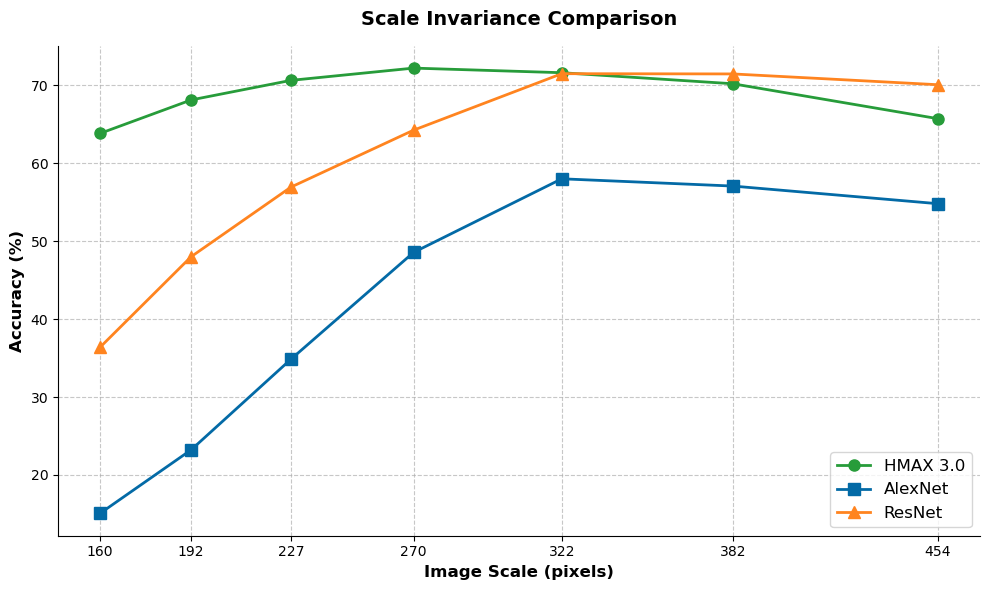

In [ ]:
# --- Line Graph for Scale Invariance ---
scales = [160, 192, 227, 270, 322, 382, 454]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot HMAX 3.0
ax.plot(scales, hmax_adj, marker='o', linewidth=2, markersize=8,
        label=global_model_names['HMAX 3.0'], color=global_palette['HMAX 3.0'])

# Plot AlexNet
ax.plot(scales, alexnet_data_aug, marker='s', linewidth=2, markersize=8,
        label=global_model_names['AlexNet'], color=global_palette['AlexNet'])

# Plot ResNet
ax.plot(scales, resnet_data_aug, marker='^', linewidth=2, markersize=8,
        label=global_model_names['ResNet'], color=global_palette['ResNet'])

# Styling
ax.set_xlabel('Image Scale (pixels)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Scale Invariance Comparison', fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(scales)
ax.set_xticklabels(scales)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}/scale_invariance_line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

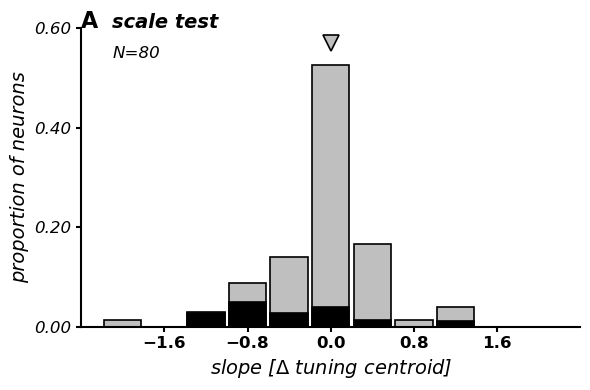

In [ ]:
# 2. X-Axis Construction
spacing = 0.4
center_index = 5
x_values = [(i - center_index) * spacing for i in range(len(V4_Bar_Data_Pasupathy))]

# 3. Setup the Plot
fig, ax = plt.subplots(figsize=(6, 4))
visual_width = 0.36

# Draw the TOTAL bars first (Gray)
ax.bar(x_values, V4_Bar_Data_Pasupathy, width=visual_width, color='#bfbfbf', edgecolor='black', linewidth=1.2)

# Draw the SIGNIFICANT bars on top (Black)
# This overlays the bottom portion of the gray bars
ax.bar(x_values, V4_Bar_Data_Pasupathy_significant, width=visual_width, color='black', edgecolor='black', linewidth=1.2)

# 4. Styling
ticks = [-1.6, -0.8, 0.0, 0.8, 1.6]
ax.set_xticks(ticks)
ax.set_xticklabels(['−1.6', '−0.8', '0.0', '0.8', '1.6'], fontsize=12, fontweight='bold')
ax.set_xlabel(r'slope [$\Delta$ tuning centroid]', fontsize=14, style='italic')

ax.set_ylim(0, 0.60)
ax.set_yticks([0.00, 0.20, 0.40, 0.60])
ax.set_yticklabels(['0.00', '0.20', '0.40', '0.60'], fontsize=12, style='italic')
ax.set_ylabel('proportion of neurons', fontsize=14, style='italic')

# Marker & Text
ax.plot(0, 0.57, marker='v', markersize=12, markerfacecolor='#bfbfbf', markeredgecolor='black', markeredgewidth=1.2)
ax.text(-2.4, 0.60, 'A', fontsize=16, fontweight='bold')
ax.text(-2.1, 0.60, 'scale test', fontsize=14, fontweight='bold', style='italic')
ax.text(-2.1, 0.54, 'N=80', fontsize=12, style='italic')

# Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(width=1.5)

plt.tight_layout()
plt.show()

In [ ]:
# V4_Bar_Data_Pasupathy

V4_Bar_Data_Pasupathy = [
    0.014147909967845543, 0.0, 0.029581993569131756, 0.08874598070739544,
    0.14019292604501604, 0.5260450160771705, 0.1659163987138263,
    0.014147909967845543, 0.0398713826366559, 0.0, 0.0
]

# Black bars (Significant values)
V4_Bar_Data_Pasupathy_significant = [
    0, 0, 0.02700964630225076, 0.050160771704180034,
    0.02700964630225076, 0.0398713826366559, 0.014147909967845543,
    0, 0.01157556270096455, 0, 0
]

N_V4 = 80
counts_A = np.round(np.array(V4_Bar_Data_Pasupathy) * N_V4).astype(int)
print(counts_A)

[ 1  0  2  7 11 42 13  1  3  0  0]
